In [35]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [36]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression


In [37]:
#import Kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *


In [38]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_predict



In [40]:
from imblearn.over_sampling import SMOTE


In [41]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


In [42]:
#set viewing options
pd.set_option('display.width', 1000)  # Set the maximum width of the display
pd.set_option('display.max_columns', None)  # Display all columns without truncation
np.set_printoptions(linewidth=150)

In [43]:
X_df = pd.read_csv('X_df_normalized.csv', sep= ',')
y_df = pd.read_csv('y_df.csv', sep = ',')
whole_csv = pd.read_csv('whole_csv.csv')
X_df['wine_type'] = whole_csv['wine_type_white']


In [44]:
X_train, x_test, y_train, y_test = train_test_split( X_df, y_df, test_size = 0.2, random_state = 42)


/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


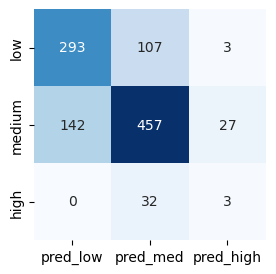

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       403
           1       0.77      0.73      0.75       626
           2       0.09      0.09      0.09        35

    accuracy                           0.71      1064
   macro avg       0.51      0.51      0.51      1064
weighted avg       0.71      0.71      0.71      1064



In [52]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
parameters = {'bootstrap': True, 'max_depth': None, 'min_samples_split': 11, 'n_estimators': 200, 'class_weight': 'balanced', 'max_features': 4}

rf_classifier = RandomForestClassifier(** parameters)
rf_classifier.fit(X_train_smote, y_train_smote)
y_pred = rf_classifier.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index = ['low', 'medium', 'high'], columns = ['pred_low', 'pred_med', 'pred_high'])
plt.figure(figsize = (3,3))
sns.heatmap(conf_matrix_df, annot = True, cmap ='Blues', fmt= 'd', cbar= False)
plt.show()
print(classification_report(y_test, y_pred))



In [46]:
# parameters = {'bootstrap': True, 'max_depth': None, 'min_samples_split': 11, 'n_estimators': 200, 'class_weight': 'balanced', 'max_features': 4}
# rf_classifier = RandomForestClassifier(**parameters)

# skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)
# y_pred = cross_val_predict(rf_classifier, X_train_smote, y_train_smote, cv=skf)
# print(classification_report(y_train_smote, y_pred))
# conf_matrix = confusion_matrix(y_train_smote, y_pred)
# conf_matrix_df = pd.DataFrame(conf_matrix, index = ['low', 'medium', 'high'], columns = ['pred_low', 'pred_med', 'pred_high'])
# plt.figure(figsize = (3,3))
# sns.heatmap(conf_matrix_df, annot = True, cmap ='Blues', fmt= 'd', cbar= False)
# plt.show()


# rf_classifier.fit(X_train_smote, y_train_smote)
# y_pred = rf_classifier.predict(x_test)
# conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_df = pd.DataFrame(conf_matrix, index = ['low', 'medium', 'high'], columns = ['pred_low', 'pred_med', 'pred_high'])
# plt.figure(figsize = (3,3))
# sns.heatmap(conf_matrix_df, annot = True, cmap ='Blues', fmt= 'd', cbar= False)
# plt.show()
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type
0,0.247934,0.086667,0.253012,0.009202,0.059801,0.079861,0.276498,0.100829,0.286822,0.365169,0.420290,1.0
1,0.305785,0.100000,0.409639,0.159509,0.063123,0.125000,0.292627,0.206092,0.209302,0.089888,0.115942,1.0
2,0.247934,0.146667,0.138554,0.061350,0.086379,0.171875,0.535714,0.167534,0.465116,0.213483,0.217391,1.0
3,0.132231,0.060000,0.162651,0.032209,0.066445,0.093750,0.225806,0.098901,0.573643,0.185393,0.333333,1.0
4,0.429752,0.253333,0.186747,0.033742,0.139535,0.062500,0.211982,0.212840,0.465116,0.230337,0.217391,0.0
